In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

## [Метод группового учета аргументов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE_%D1%83%D1%87%D1%91%D1%82%D0%B0_%D0%B0%D1%80%D0%B3%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2)

Англ. [Group method of data handling](https://en.wikipedia.org/wiki/Group_method_of_data_handling) (GMDH).

Избретен в СССР академиком [А.Г.Ивахненко.](https://ru.wikipedia.org/wiki/%D0%98%D0%B2%D0%B0%D1%85%D0%BD%D0%B5%D0%BD%D0%BA%D0%BE,_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B5%D0%B9_%D0%93%D1%80%D0%B8%D0%B3%D0%BE%D1%80%D1%8C%D0%B5%D0%B2%D0%B8%D1%87)


Давайте вспомним дилемму смещения–дисперсии и проблему переобучения моделей.

- [Детальная статья про переобучение](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5) 
- [Раздел про переобучение из scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
- [Дилемма смещения–дисперсии](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%BB%D0%B5%D0%BC%D0%BC%D0%B0_%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%E2%80%93%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8)

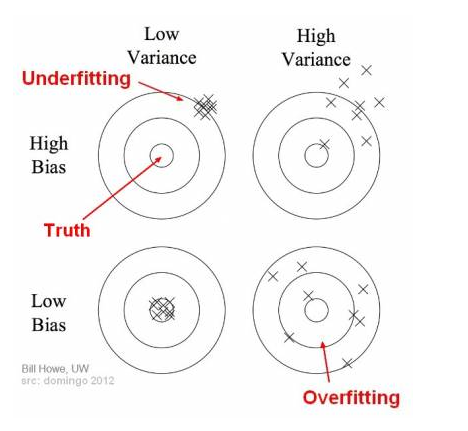

In [3]:
Image('img/bv1.png', width='40%')

**Возможно ли создать метод, в алгоритмы которого была бы заложено преодоление проблемы переобучения? Да, и это МГУА.**

[Презентация](http://www.machinelearning.ru/wiki/images/6/65/DM_L3-2_part1.pdf) с детальным описанием работы метода.

Краткая идея метода заключается в том, что метод напоминает глубокую нейронную сеть. Но используется неклассическая математическая модель нейрона.

Слои нейронной сети выращиваются с помощью эволюционных методов (разновидностей генетического алгоритма) до тех пор пока растет качество модели и еще не наступает переобучение.

Идея МГУА показана на следующем рисунке:

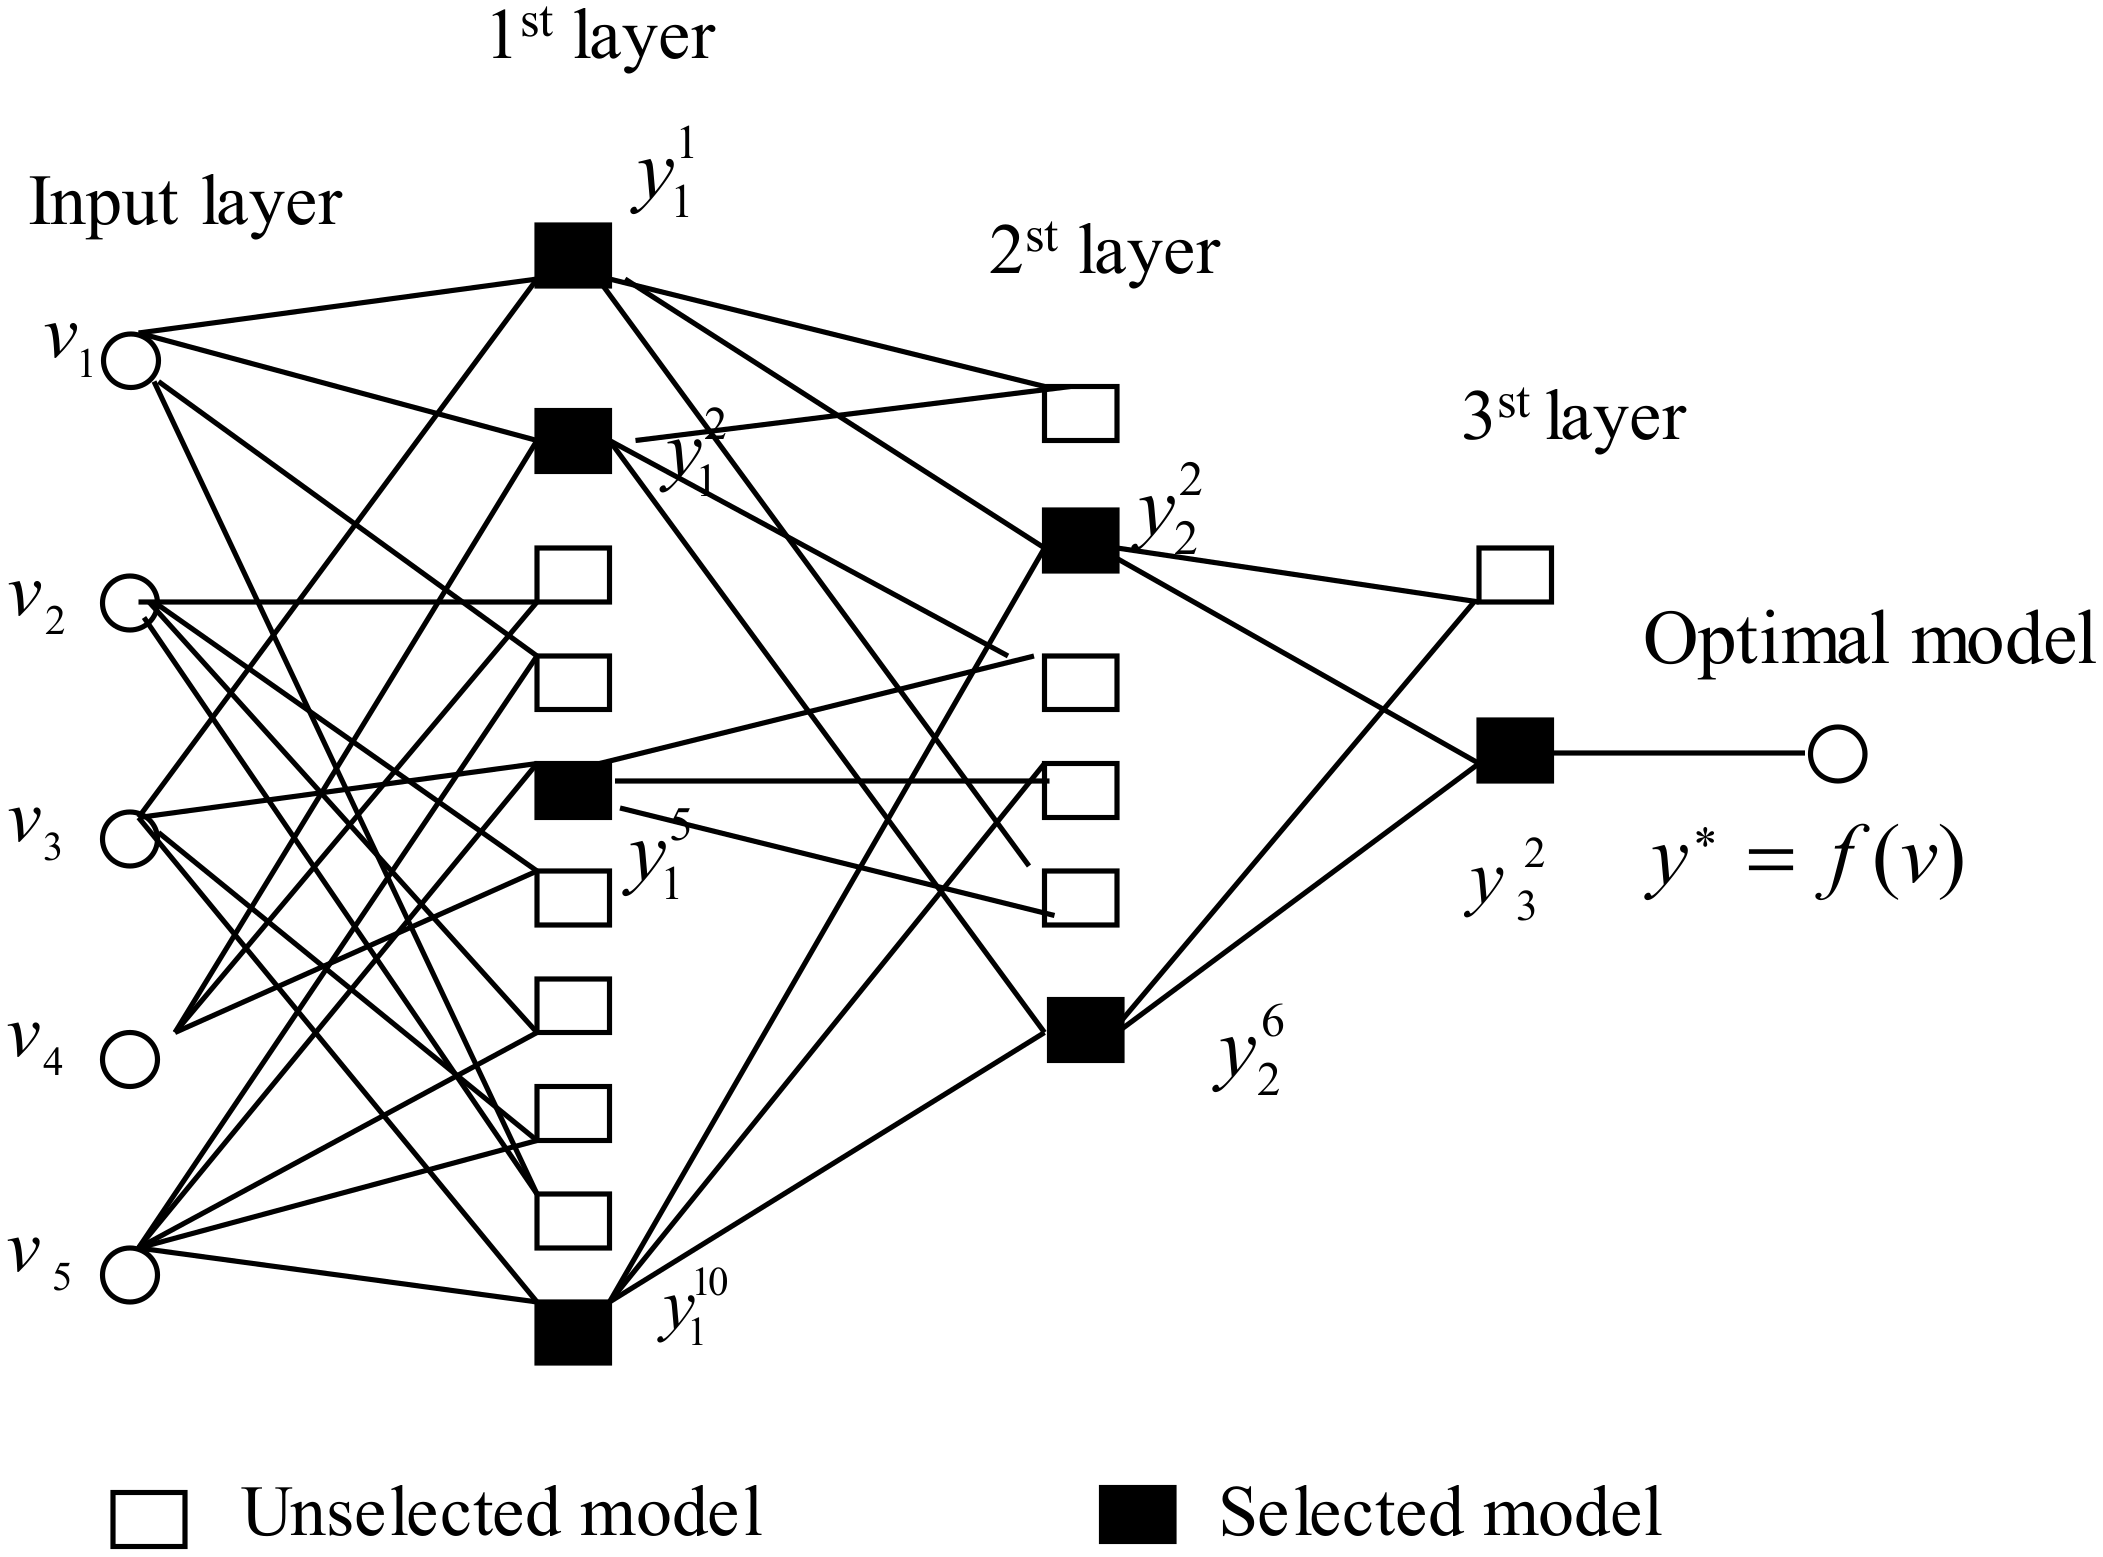

In [4]:
Image('img/gmdh.png', width='50%')

В настоящее время метод вызывает значительный интерес у исследователей. Методу посвящено много публикаций за последние годы. Современные модификации метода предполагают использование эволюционного моделирования и нечеткой логики.

### Эксперименты

В scikit-learn данная модель не реализована напрямую. Она реализована в библиотеке [GmdhPy.](https://github.com/kvoyager/GmdhPy)

Для работы с библиотекой необходимо скачать библиотеку в виде архива и использовать метод [ручной установки пакета.](https://www.activestate.com/resources/quick-reads/how-to-manually-install-python-packages/)

In [5]:
from gmdhpy import gmdh

In [6]:
boston = load_boston()
boston_X, boston_y = boston['data'], boston['target']
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston_X, boston_y, test_size=0.2, random_state=1)

In [7]:
model = gmdh.Regressor()
model.fit(boston_X_train, boston_y_train)
y_pred = model.predict(boston_X_test)
result = mean_absolute_error(boston_y_test, y_pred)
print(model)
print('MAE={}'.format(result))

train layer0 in 0.06 sec
train layer1 in 0.23 sec
train layer2 in 0.24 sec
train layer3 in 0.22 sec
train layer4 in 0.22 sec
train layer5 in 0.22 sec
train layer6 in 0.23 sec
train layer7 in 0.22 sec
train layer8 in 0.21 sec
train layer9 in 0.22 sec
Self-organizing deep learning polynomial neural network
MAE=3.2568485867598214


In [8]:
model = gmdh.Regressor(ref_functions=('linear_cov', 'quadratic', 'cubic', 'linear'))
model.fit(boston_X_train, boston_y_train, validation_data=(boston_X_test, boston_y_test))
y_pred = model.predict(boston_X_test)
result = mean_absolute_error(boston_y_test, y_pred)
print(model)
print('MAE={}'.format(result))

train layer0 in 0.32 sec
train layer1 in 1.21 sec
train layer2 in 1.28 sec
train layer3 in 1.25 sec
train layer4 in 1.38 sec
train layer5 in 1.30 sec
train layer6 in 1.26 sec
train layer7 in 1.23 sec
train layer8 in 1.26 sec
train layer9 in 1.44 sec
train layer10 in 1.43 sec
train layer11 in 1.28 sec
train layer12 in 1.22 sec
train layer13 in 1.19 sec
train layer14 in 1.27 sec
train layer15 in 1.20 sec
train layer16 in 1.19 sec
train layer17 in 1.28 sec
train layer18 in 1.16 sec
train layer19 in 1.16 sec
train layer20 in 1.23 sec
train layer21 in 1.26 sec
train layer22 in 1.70 sec
train layer23 in 1.33 sec
train layer24 in 1.40 sec
train layer25 in 1.29 sec
train layer26 in 1.26 sec
Self-organizing deep learning polynomial neural network
MAE=2.1384971541397326


In [9]:
# Результаты
array_labels2 = ['GMDH_1', 'GMDH_2']
array_mae2 = [3.2568485867598214, 2.1384971541397326]

In [10]:
model_gb = GradientBoostingRegressor()
model_gb.fit(boston_X_train, boston_y_train)
y_pred_gb = model.predict(boston_X_test)
result_gb = mean_absolute_error(boston_y_test, y_pred)

array_labels2 = array_labels2 + ['GB']
array_mae2 = array_mae2 + [result_gb]

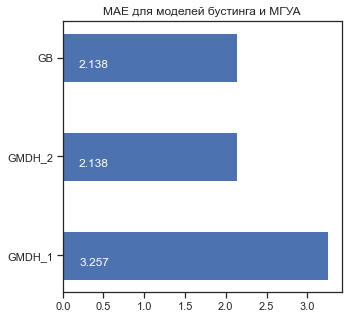

In [11]:
vis_models_quality(array_mae2, array_labels2, 'MAE для моделей бустинга и МГУА')

### Дополнительные источники (по МГУА)

- [Статья о МГУА на machinelearning.ru](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%93%D0%A3%D0%90)
- [Обзор задач, решаемых по алгоритмам Метода Группового Учета Аргументов](http://www.gmdh.net/articles/rus/obzorzad.pdf)